## EDA para el dataset de California Housing

### **1. Importación de librerías**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Estilo visual  para los gráficos
plt.style.use('seaborn-v0_8-whitegrid')

### **2. Carga y preparación de datos**

#### **2.1 Carga inicial del dataset**

In [2]:
train = pd.read_csv('../data/train.csv')

# Mostramos las primeras filas para ver la estructura
print("Primeras 5 filas del conjunto de datos original:")
display(train.head())

Primeras 5 filas del conjunto de datos original:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### **2.2.  Traducción de columnas y conversión a metros cuadrados**

In [3]:
# Diccionario de traducción de columnas
columnas_traducidas = {
    'MSSubClass': 'TipoDeClaseMS',
    'MSZoning': 'ZonificaciónMS',
    'LotFrontage': 'FrenteLote',
    'LotArea': 'ÁreaLote',
    'Street': 'Calle',
    'Alley': 'Callejón',
    'LotShape': 'FormaLote',
    'LandContour': 'ContornoTerreno',
    'Utilities': 'Servicios',
    'LotConfig': 'ConfiguraciónLote',
    'LandSlope': 'PendienteTerreno',
    'Neighborhood': 'Vecindario',
    'Condition1': 'Condición1',
    'Condition2': 'Condición2',
    'BldgType': 'TipoEdificio',
    'HouseStyle': 'EstiloCasa',
    'OverallQual': 'CalidadGeneral',
    'OverallCond': 'CondiciónGeneral',
    'YearBuilt': 'AñoConstrucción',
    'YearRemodAdd': 'AñoRenovación',
    'RoofStyle': 'EstiloTecho',
    'RoofMatl': 'MaterialTecho',
    'Exterior1st': 'Exterior1',
    'Exterior2nd': 'Exterior2',
    'MasVnrType': 'TipoRevestimientoMampostería',
    'MasVnrArea': 'ÁreaRevestimientoMampostería',
    'ExterQual': 'CalidadExterior',
    'ExterCond': 'CondiciónExterior',
    'Foundation': 'Cimentación',
    'BsmtQual': 'CalidadSótano',
    'BsmtCond': 'CondiciónSótano',
    'BsmtExposure': 'ExposiciónSótano',
    'BsmtFinType1': 'TipoAcabadoSótano1',
    'BsmtFinSF1': 'MetrosAcabadosSótano1',
    'BsmtFinType2': 'TipoAcabadoSótano2',
    'BsmtFinSF2': 'MetrosAcabadosSótano2',
    'BsmtUnfSF': 'MetrosNoAcabadosSótano',
    'TotalBsmtSF': 'MetrosTotalesSótano',
    'Heating': 'Calefacción',
    'HeatingQC': 'CalidadCalefacción',
    'CentralAir': 'AireAcondicionadoCentral',
    'Electrical': 'Eléctrico',
    '1stFlrSF': 'Metros1raPlanta',
    '2ndFlrSF': 'Metros2daPlanta',
    'LowQualFinSF': 'MetrosBajaCalidad',
    'GrLivArea': 'MetrosHabitables',
    'BsmtFullBath': 'BañosCompletosSótano',
    'BsmtHalfBath': 'MediosBañosSótano',
    'FullBath': 'BañosCompletos',
    'HalfBath': 'MediosBaños',
    'BedroomAbvGr': 'DormitoriosSobreSuelo',
    'KitchenAbvGr': 'CocinasSobreSuelo',
    'KitchenQual': 'CalidadCocina',
    'TotRmsAbvGrd': 'TotalHabitacionesSobreSuelo',
    'Functional': 'Funcionalidad',
    'Fireplaces': 'Chimeneas',
    'FireplaceQu': 'CalidadChimenea',
    'GarageType': 'TipoGaraje',
    'GarageYrBlt': 'AñoConstrucciónGaraje',
    'GarageFinish': 'AcabadoGaraje',
    'GarageCars': 'CochesGaraje',
    'GarageArea': 'ÁreaGaraje',
    'GarageQual': 'CalidadGaraje',
    'GarageCond': 'CondiciónGaraje',
    'PavedDrive': 'EntradaPavimentada',
    'WoodDeckSF': 'MetrosDeckMadera',
    'OpenPorchSF': 'MetrosPorcheAbierto',
    'EnclosedPorch': 'MetrosPorcheCerrado',
    '3SsnPorch': 'MetrosPorche3Estaciones',
    'ScreenPorch': 'MetrosPorcheMalla',
    'PoolArea': 'ÁreaPiscina',
    'PoolQC': 'CalidadPiscina',
    'Fence': 'Cerca',
    'MiscFeature': 'CaracterísticaExtra',
    'MiscVal': 'ValorExtra',
    'MoSold': 'MesVenta',
    'YrSold': 'AñoVenta',
    'SaleType': 'TipoVenta',
    'SaleCondition': 'CondiciónVenta',
    'SalePrice': 'PrecioVenta'
}

# Creamos nuevo DataFrame con las columnas traducidas
train_data = train.rename(columns=columnas_traducidas)

# Convertimos pies² a metros²
factor_conversion = 0.092903

columnas_a_convertir = [col for col in train_data.columns if 'Metros' in col or 'Area' in col]
for col in columnas_a_convertir:
    train_data[col] = train_data[col] * factor_conversion

print("\nDatos traducidos y convertidos a metros cuadrados.")
print("Primeras 5 filas del conjunto de datos procesado:")
display(train_data.head())


Datos traducidos y convertidos a metros cuadrados.
Primeras 5 filas del conjunto de datos procesado:


,Id,TipoDeClaseMS,ZonificaciónMS,FrenteLote,ÁreaLote,Calle,Callejón,FormaLote,ContornoTerreno,Servicios,...,ÁreaPiscina,CalidadPiscina,Cerca,CaracterísticaExtra,ValorExtra,MesVenta,AñoVenta,TipoVenta,CondiciónVenta,PrecioVenta
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **3. Análisis exploratorio de datos**

#### **3.1 Información básica del dataset**

In [4]:
print("Dimensiones del conjunto de datos:")
print(f"Número de casas (filas): {train_data.shape[0]}")
print(f"Número de características (columnas): {train_data.shape[1]}")

# Tipos de datos
print("\nTipos de datos en las columnas:")
display(train_data.dtypes.value_counts())
print("\nEjemplos de algunas columnas:")
display(train_data.dtypes.head(10))

Dimensiones del conjunto de datos:
Número de casas (filas): 1460
Número de características (columnas): 81

Tipos de datos en las columnas:


object     43
int64      22
float64    16
Name: count, dtype: int64


Ejemplos de algunas columnas:


Id                   int64
TipoDeClaseMS        int64
ZonificaciónMS      object
FrenteLote         float64
ÁreaLote             int64
Calle               object
Callejón            object
FormaLote           object
ContornoTerreno     object
Servicios           object
dtype: object

#### **3.2 Análisis de la variable objetivo (PrecioVenta)**


Estadísticas descriptivas del precio de venta:


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: PrecioVenta, dtype: float64

Precio mínimo: $34,900.00
Precio máximo: $755,000.00
Precio promedio: $180,921.20
Precio mediano: $163,000.00


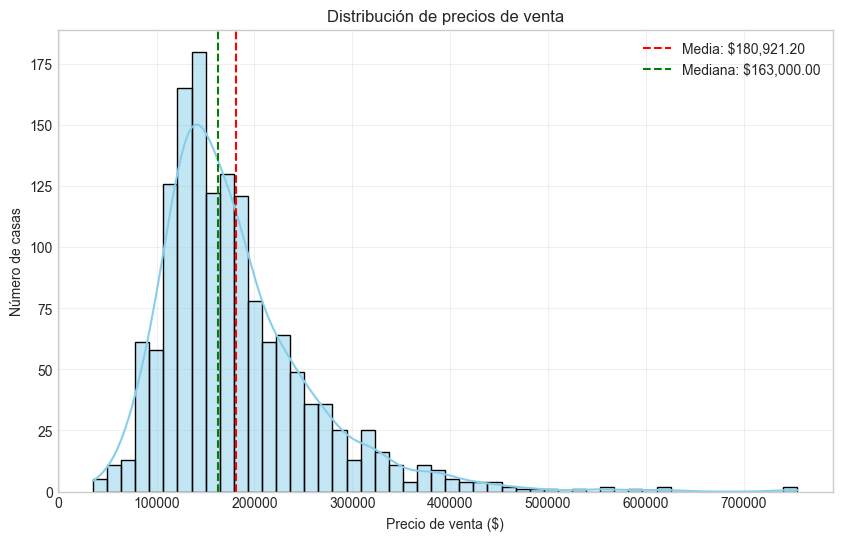

In [5]:
price_stats = train_data['PrecioVenta'].describe()
print("\nEstadísticas descriptivas del precio de venta:")
display(price_stats)

print(f"Precio mínimo: ${price_stats['min']:,.2f}")
print(f"Precio máximo: ${price_stats['max']:,.2f}")
print(f"Precio promedio: ${price_stats['mean']:,.2f}")
print(f"Precio mediano: ${price_stats['50%']:,.2f}")

# Visualizamos la distribución
plt.figure(figsize=(10, 6))
sns.histplot(train_data['PrecioVenta'], bins=50, kde=True, color='skyblue')
plt.axvline(price_stats['mean'], color='red', linestyle='--', label=f'Media: ${price_stats["mean"]:,.2f}')
plt.axvline(price_stats['50%'], color='green', linestyle='--', label=f'Mediana: ${price_stats["50%"]:,.2f}')
plt.xlabel('Precio de venta ($)')
plt.ylabel('Número de casas')
plt.title('Distribución de precios de venta')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

<small>

**Observaciones sobre la distribución de precios:**  
- La distribución tiene una cola hacia la derecha.  
- Hay más casas con precios bajos-medios que con precios altos.  
- La media es mayor que la mediana, lo que confirma la asimetría.

</small>


#### **3.3 Identificación de valores faltantes**


Columnas con valores faltantes:


,Valores faltantes,Porcentaje (%)
CalidadPiscina,1453,99.520548
CaracterísticaExtra,1406,96.301370
Callejón,1369,93.767123
Cerca,1179,80.753425
TipoRevestimientoMampostería,872,59.726027
CalidadChimenea,690,47.260274
FrenteLote,259,17.739726
TipoGaraje,81,5.547945
AñoConstrucciónGaraje,81,5.547945
AcabadoGaraje,81,5.547945


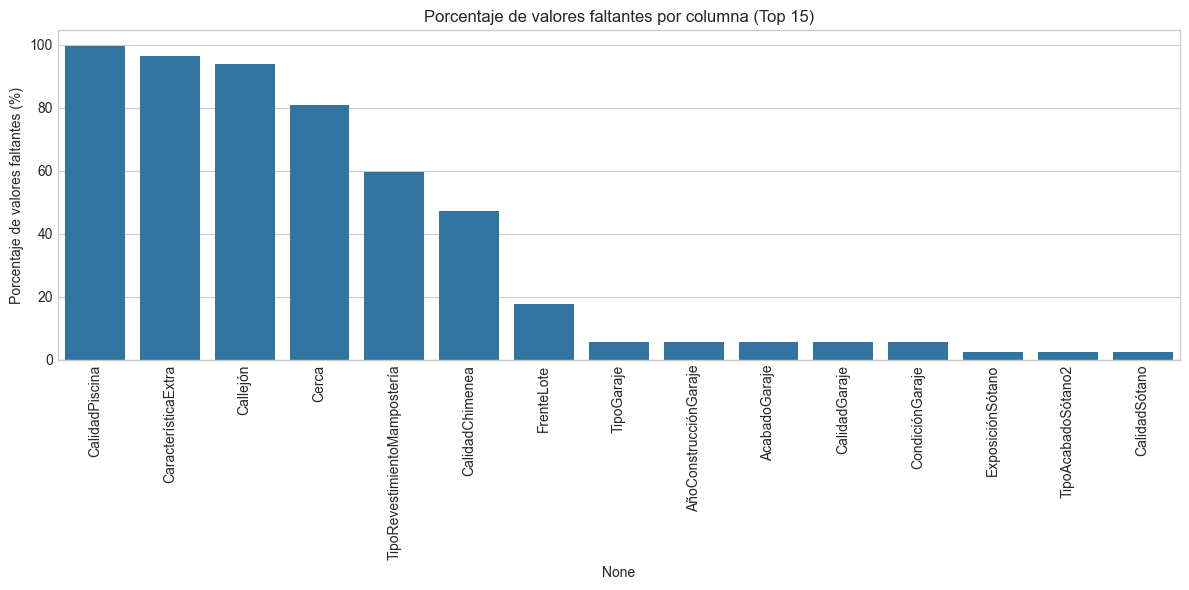

In [6]:
# Buscamos valores faltantes
missing_data = train_data.isnull().sum()
missing_percent = (missing_data / len(train_data)) * 100

# DataFrame para visualizar resultados
missing_df = pd.DataFrame({
    'Valores faltantes': missing_data,
    'Porcentaje (%)': missing_percent
})

# Filtramos solo columnas con valores faltantes
missing_df = missing_df[missing_df['Valores faltantes'] > 0].sort_values(
    'Valores faltantes', ascending=False)

print("\nColumnas con valores faltantes:")
display(missing_df)

# Visualizamos las columnas con más valores faltantes
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_df.index[:15], y='Porcentaje (%)', data=missing_df.head(15))
plt.xticks(rotation=90)
plt.title('Porcentaje de valores faltantes por columna (Top 15)')
plt.ylabel('Porcentaje de valores faltantes (%)')
plt.tight_layout()
plt.show()

<small>

**Observaciones sobre valores faltantes:**  
- Varias columnas tienen muchos valores faltantes.  
- Para columnas como **CalidadPiscina**, los valores faltantes probablemente indican ausencia.  
- Necesitamos tratar estos valores para continuar con el análisis.

</small>


#### **3.4 Tratamiento de valores faltantes**

In [7]:
# Creamos una copia del DataFrame
train_data_clean = train_data.copy()

print("Aplicando tratamiento a valores faltantes:")

# 1. Características opcionales (ausencia = no existe)
# Piscina
train_data_clean['CalidadPiscina'].fillna('NoTiene', inplace=True)
train_data_clean['ÁreaPiscina'].fillna(0, inplace=True)

# Garaje
garage_cols = ['TipoGaraje', 'AcabadoGaraje', 'CalidadGaraje', 'CondiciónGaraje']
for col in garage_cols:
    train_data_clean[col].fillna('NoGaraje', inplace=True)
train_data_clean['AñoConstrucciónGaraje'].fillna(0, inplace=True)
train_data_clean['CochesGaraje'].fillna(0, inplace=True)
train_data_clean['ÁreaGaraje'].fillna(0, inplace=True)

# Sótano
basement_cols = ['CalidadSótano', 'CondiciónSótano', 'ExposiciónSótano', 
                 'TipoAcabadoSótano1', 'TipoAcabadoSótano2']
for col in basement_cols:
    train_data_clean[col].fillna('NoSótano', inplace=True)
train_data_clean['MetrosAcabadosSótano1'].fillna(0, inplace=True)
train_data_clean['MetrosAcabadosSótano2'].fillna(0, inplace=True)
train_data_clean['MetrosNoAcabadosSótano'].fillna(0, inplace=True)
train_data_clean['MetrosTotalesSótano'].fillna(0, inplace=True)
train_data_clean['BañosCompletosSótano'].fillna(0, inplace=True)
train_data_clean['MediosBañosSótano'].fillna(0, inplace=True)

# Otras características opcionales
train_data_clean['CaracterísticaExtra'].fillna('Ninguna', inplace=True)
train_data_clean['Callejón'].fillna('NoTiene', inplace=True)
train_data_clean['Cerca'].fillna('NoTiene', inplace=True)
train_data_clean['CalidadChimenea'].fillna('NoTiene', inplace=True)
train_data_clean['TipoRevestimientoMampostería'].fillna('Ninguno', inplace=True)
train_data_clean['ÁreaRevestimientoMampostería'].fillna(0, inplace=True)

# 2. Variables numéricas importantes
train_data_clean['FrenteLote'].fillna(train_data_clean['FrenteLote'].median(), inplace=True)

# 3. Otras variables con pocos valores faltantes
train_data_clean['Eléctrico'].fillna(train_data_clean['Eléctrico'].mode()[0], inplace=True)

# Verificamos si quedan valores faltantes
remaining_missing = train_data_clean.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0]

print("\nValores faltantes restantes:")
if len(remaining_missing) > 0:
    display(remaining_missing)
else:
    print("No quedan valores faltantes en el conjunto de datos.")

# Guardamos el dataset limpio
train_data_clean.to_csv('../data/train_es_clean.csv', index=False)
print("\nDatos limpios guardados en '../data/train_es_clean.csv'")

Aplicando tratamiento a valores faltantes:

Valores faltantes restantes:
No quedan valores faltantes en el conjunto de datos.

Datos limpios guardados en '../data/train_es_clean.csv'


/var/folders/cj/h4ygcbgx7zx76v8tmq389b8c0000gn/T/ipykernel_71170/3886419536.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_clean['CalidadPiscina'].fillna('NoTiene', inplace=True)
/var/folders/cj/h4ygcbgx7zx76v8tmq389b8c0000gn/T/ipykernel_71170/3886419536.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are s

## **4. Análisis de correlaciones**

#### **4.1. Cálculo de correlaciones entre variables numéricas**

In [8]:
# Seleccionamos todas las columnas numéricas
numeric_columns = train_data_clean.select_dtypes(include=['int64', 'float64']).columns
print(f"El dataset contiene {len(numeric_columns)} variables numéricas.")

# Calculamos correlaciones
correlation_matrix = train_data_clean[numeric_columns].corr()
correlations_with_price = correlation_matrix['PrecioVenta'].sort_values(ascending=False)

print("\nLas 15 variables con mayor correlación con el precio:")
display(correlations_with_price.head(15))

print("\nLas variables con menor correlación con el precio:")
display(correlations_with_price.tail(10))

El dataset contiene 38 variables numéricas.

Las 15 variables con mayor correlación con el precio:


PrecioVenta                     1.000000
CalidadGeneral                  0.790982
MetrosHabitables                0.708624
CochesGaraje                    0.640409
ÁreaGaraje                      0.623431
MetrosTotalesSótano             0.613581
Metros1raPlanta                 0.605852
BañosCompletos                  0.560664
TotalHabitacionesSobreSuelo     0.533723
AñoConstrucción                 0.522897
AñoRenovación                   0.507101
ÁreaRevestimientoMampostería    0.472614
Chimeneas                       0.466929
MetrosAcabadosSótano1           0.386420
FrenteLote                      0.334771
Name: PrecioVenta, dtype: float64


Las variables con menor correlación con el precio:


MetrosAcabadosSótano2   -0.011378
MediosBañosSótano       -0.016844
ValorExtra              -0.021190
Id                      -0.021917
MetrosBajaCalidad       -0.025606
AñoVenta                -0.028923
CondiciónGeneral        -0.077856
TipoDeClaseMS           -0.084284
MetrosPorcheCerrado     -0.128578
CocinasSobreSuelo       -0.135907
Name: PrecioVenta, dtype: float64

#### **4.2. Visualización de correlaciones principales**

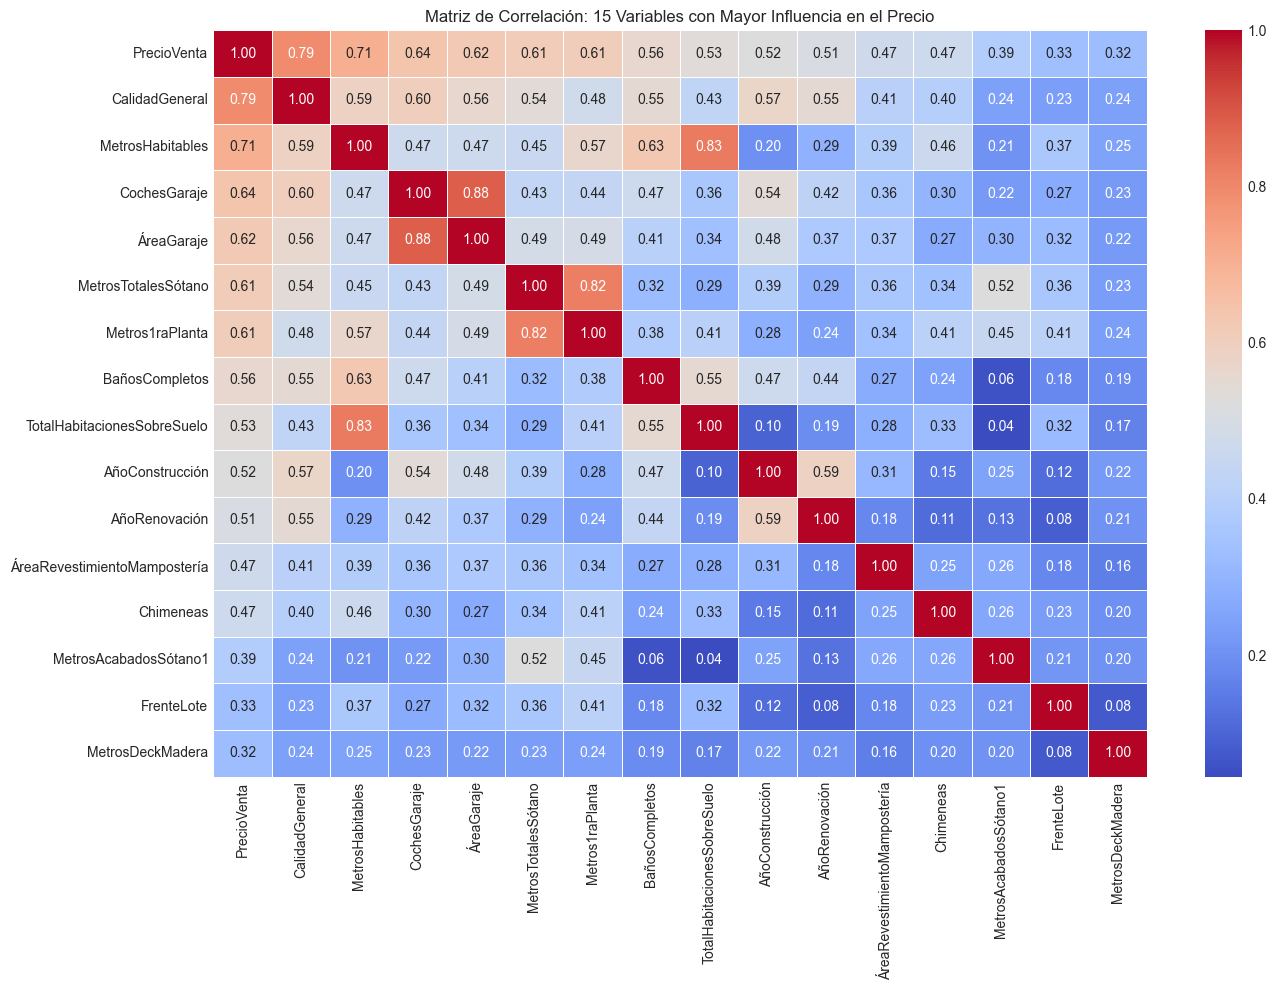

In [9]:
# Mapa de calor de correlaciones
plt.figure(figsize=(14, 10))

# Seleccionamos las 15 características más correlacionadas
top_corr_features = correlations_with_price.head(16).index  # Incluye PrecioVenta
top_corr_matrix = train_data_clean[top_corr_features].corr()

# Creamos el mapa de calor
sns.heatmap(top_corr_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=0.5)
plt.title('Matriz de Correlación: 15 Variables con Mayor Influencia en el Precio')
plt.tight_layout()
plt.show()

#### **4.3. Análisis de las variables más correlacionadas**

In [10]:
# Identificamos las variables más importantes según correlación
print("\nVariables más importantes para predecir el precio:")
top_features_list = correlations_with_price.head(15).index.tolist()[1:]  # Excluimos PrecioVenta

for i, feature in enumerate(top_features_list, 1):
    correlation = correlations_with_price[feature]
    print(f"{i}. {feature}: correlación de {correlation:.4f} - {'Fuerte' if correlation > 0.7 else 'Media' if correlation > 0.5 else 'Baja'} relación positiva")


Variables más importantes para predecir el precio:
1. CalidadGeneral: correlación de 0.7910 - Fuerte relación positiva
2. MetrosHabitables: correlación de 0.7086 - Fuerte relación positiva
3. CochesGaraje: correlación de 0.6404 - Media relación positiva
4. ÁreaGaraje: correlación de 0.6234 - Media relación positiva
5. MetrosTotalesSótano: correlación de 0.6136 - Media relación positiva
6. Metros1raPlanta: correlación de 0.6059 - Media relación positiva
7. BañosCompletos: correlación de 0.5607 - Media relación positiva
8. TotalHabitacionesSobreSuelo: correlación de 0.5337 - Media relación positiva
9. AñoConstrucción: correlación de 0.5229 - Media relación positiva
10. AñoRenovación: correlación de 0.5071 - Media relación positiva
11. ÁreaRevestimientoMampostería: correlación de 0.4726 - Baja relación positiva
12. Chimeneas: correlación de 0.4669 - Baja relación positiva
13. MetrosAcabadosSótano1: correlación de 0.3864 - Baja relación positiva
14. FrenteLote: correlación de 0.3348 - Baj

## **5. Análisis detallado de variables numéricas importantes**

#### **5.1. Distribución de las variables numéricas clave**


Análisis de las 5 variables numéricas más importantes:


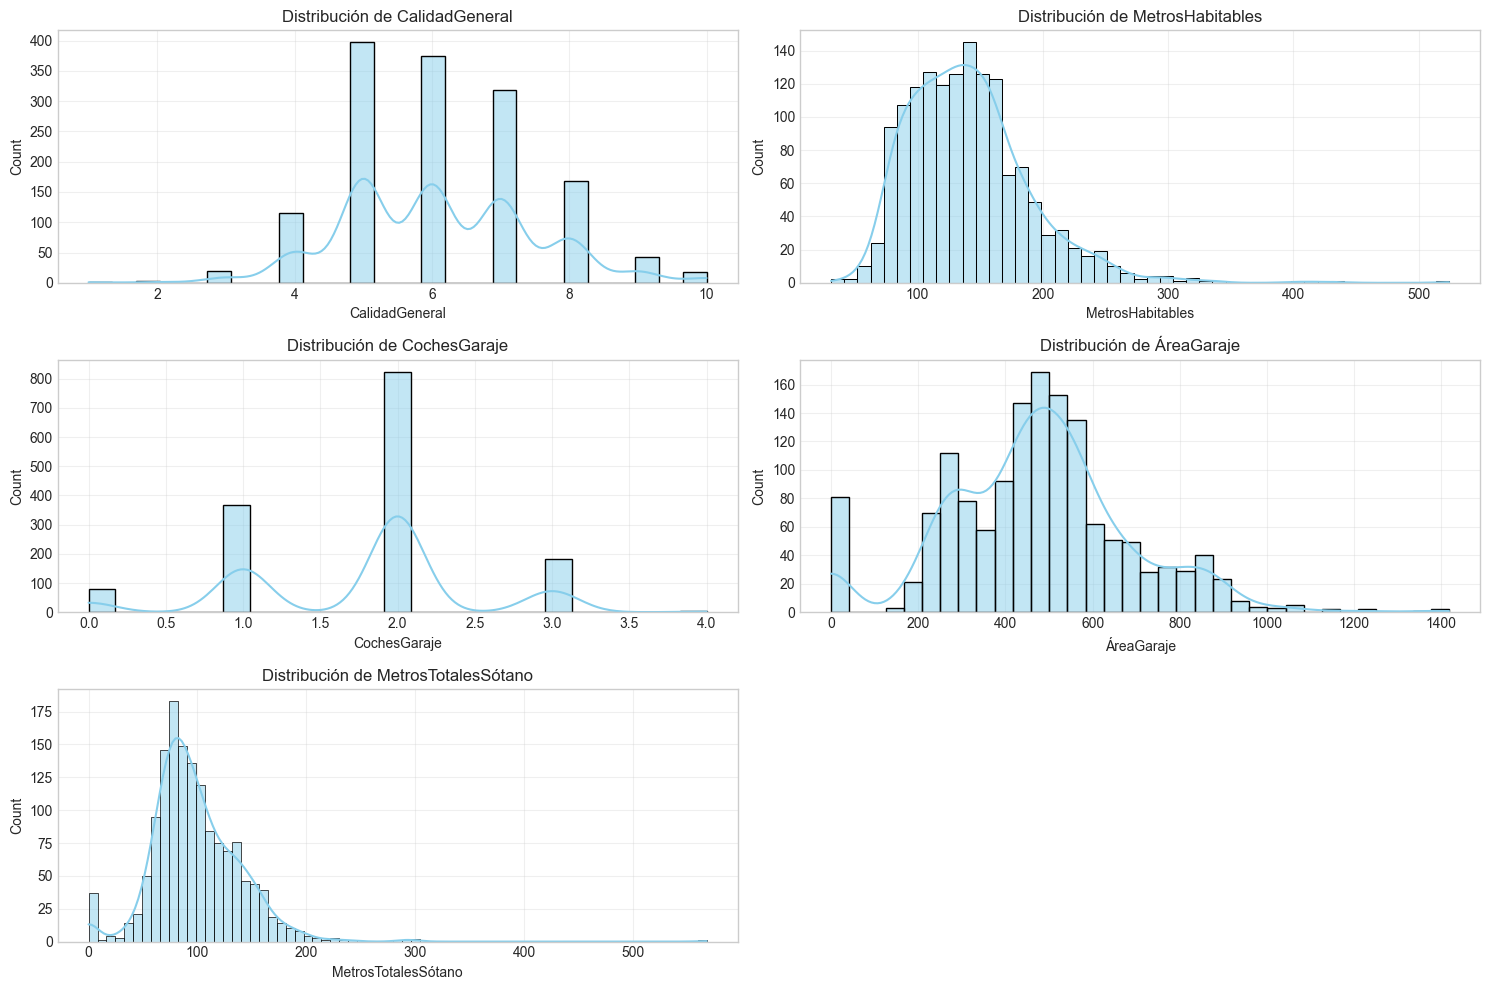


Estadísticas de variables numéricas clave:


,CalidadGeneral,MetrosHabitables,CochesGaraje,ÁreaGaraje,MetrosTotalesSótano
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,140.791124,1.767123,472.980137,98.238368
std,1.382997,48.818704,0.747315,213.804841,40.757041
min,1.000000,31.029602,0.000000,0.000000,0.000000
25%,5.000000,104.933938,1.000000,334.500000,73.927562
50%,6.000000,136.009992,2.000000,480.000000,92.113325
75%,7.000000,165.065405,2.000000,576.000000,120.611320
max,10.000000,524.158726,4.000000,1418.000000,567.637330


In [11]:
# Las 5 variables numéricas más importantes son:
key_numeric_vars = ['CalidadGeneral', 'MetrosHabitables', 'CochesGaraje', 
                    'ÁreaGaraje', 'MetrosTotalesSótano']

print(f"\nAnálisis de las 5 variables numéricas más importantes:")

# Visualizamos su distribución en una sola figura
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_numeric_vars, 1):
    plt.subplot(3, 2, i)
    sns.histplot(train_data_clean[feature], kde=True, color='skyblue')
    plt.title(f'Distribución de {feature}')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Estadísticas descriptivas
print("\nEstadísticas de variables numéricas clave:")
display(train_data_clean[key_numeric_vars].describe())

#### **5.2. Análisis de valores atípicos en variables numéricas clave**

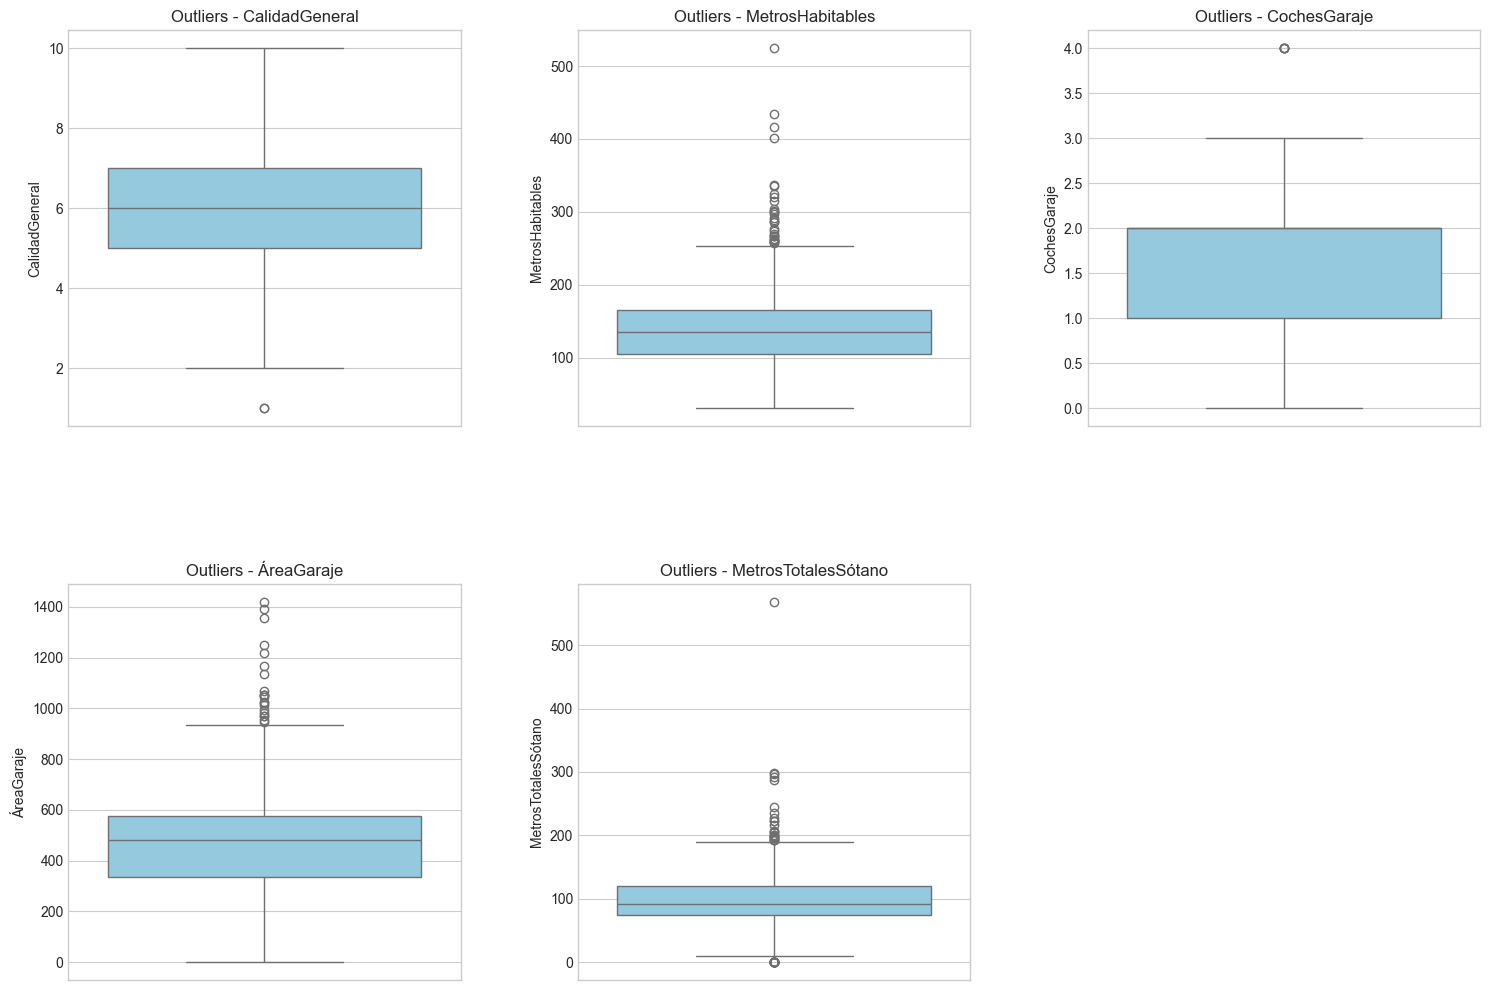

In [12]:
# Creamos boxplots individuales para cada variable
key_numeric_vars = ['CalidadGeneral', 'MetrosHabitables', 'CochesGaraje', 
                    'ÁreaGaraje', 'MetrosTotalesSótano']

# Configuramos un lienzo con subplots para cada variable
plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=train_data_clean[feature], color='skyblue')
    plt.title(f'Outliers - {feature}')
    plt.tight_layout()

plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Ajusta el espacio entre subplots
plt.show()

<small>

**Observaciones sobre outliers:**  
- **CalidadGeneral:** Pocas casas tienen calidad extremadamente alta (9-10).  
- **MetrosHabitables:** Existen algunas casas mucho más grandes que la media.  
- **CochesGaraje:** La mayoría de garajes tienen capacidad para 1 o 2 coches, con algunos outliers.  
- **ÁreaGaraje:** Hay garajes significativamente más grandes que el promedio.  
- **MetrosTotalesSótano:** Algunos sótanos son excepcionalmente grandes.  
- Estos valores atípicos podrían influir en algunos modelos de regresión.

</small>


#### **5.3. Relación entre variables numéricas clave y precio**

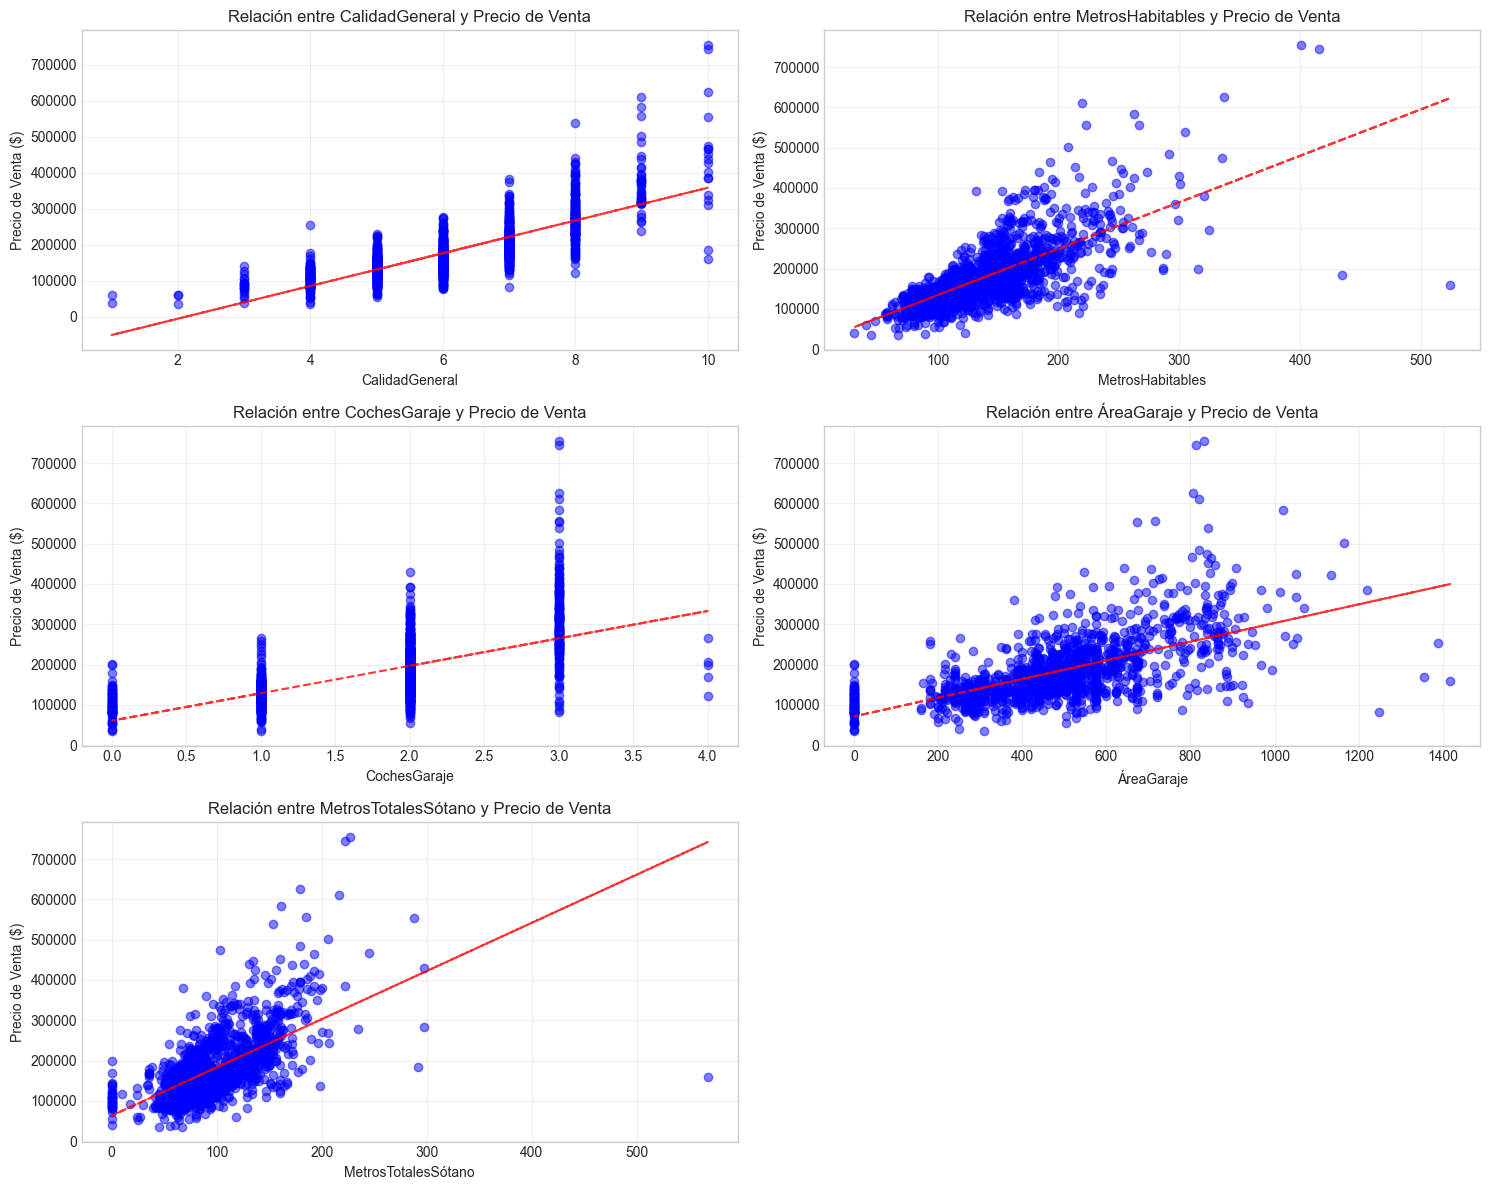

In [13]:
# Gráficos de dispersión para ver relación con el precio
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(key_numeric_vars):
    if i < len(axes):
        ax = axes[i]
        ax.scatter(train_data_clean[feature], 
                  train_data_clean['PrecioVenta'],
                  alpha=0.5,
                  color='blue')
        ax.set_xlabel(feature)
        ax.set_ylabel('Precio de Venta ($)')
        ax.set_title(f'Relación entre {feature} y Precio de Venta')
        ax.grid(True, alpha=0.3)
        
        # Línea de tendencia
        z = np.polyfit(train_data_clean[feature], train_data_clean['PrecioVenta'], 1)
        p = np.poly1d(z)
        ax.plot(train_data_clean[feature],
                p(train_data_clean[feature]),
                "r--",
                alpha=0.8)

# Eliminamos el gráfico vacío si hay uno
if len(key_numeric_vars) < len(axes):
    fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

<small>

**Interpretación de los gráficos:**  
- **CalidadGeneral:** Relación clara y casi lineal con el precio.  
- **MetrosHabitables:** A mayor tamaño, mayor precio, con algunos valores extremos.  
- **Variables del garaje:** Tanto el tamaño como la capacidad influyen positivamente.  
- **MetrosTotalesSótano:** Contribuye al valor aunque con mayor dispersión.

</small>


## **6. Análisis de variables categóricas importantes**

#### **6.1. Identificación de variables categóricas clave**

Index(['ZonificaciónMS', 'Calle', 'Callejón', 'FormaLote', 'ContornoTerreno',
       'Servicios', 'ConfiguraciónLote', 'PendienteTerreno', 'Vecindario',
       'Condición1', 'Condición2', 'TipoEdificio', 'EstiloCasa', 'EstiloTecho',
       'MaterialTecho', 'Exterior1', 'Exterior2',
       'TipoRevestimientoMampostería', 'CalidadExterior', 'CondiciónExterior',
       'Cimentación', 'CalidadSótano', 'CondiciónSótano', 'ExposiciónSótano',
       'TipoAcabadoSótano1', 'TipoAcabadoSótano2', 'Calefacción',
       'CalidadCalefacción', 'AireAcondicionadoCentral', 'Eléctrico',
       'CalidadCocina', 'Funcionalidad', 'CalidadChimenea', 'TipoGaraje',
       'AcabadoGaraje', 'CalidadGaraje', 'CondiciónGaraje',
       'EntradaPavimentada', 'CalidadPiscina', 'Cerca', 'CaracterísticaExtra',
       'TipoVenta', 'CondiciónVenta'],
      dtype='object')


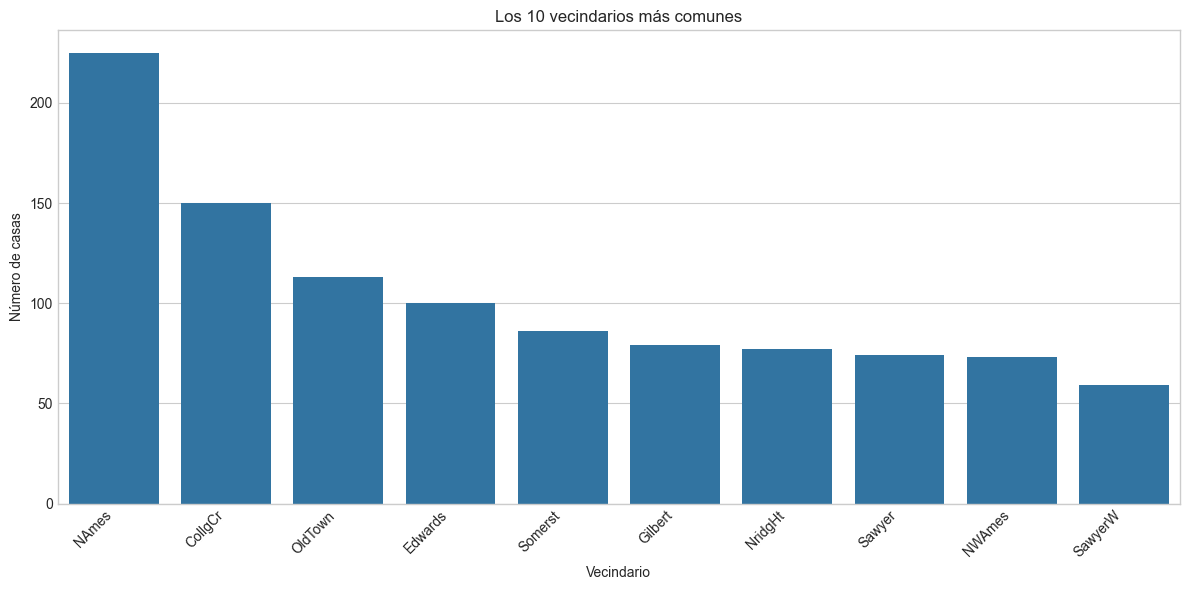

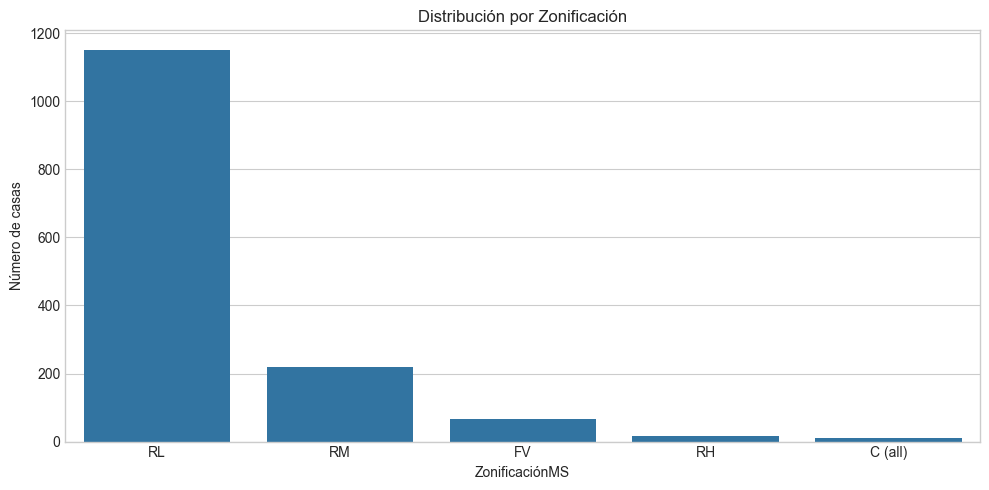

RL: Residencial Baja Densidad, RM: Residencial Media Densidad, FV: Pueblo Flotante, RH: Residencial Alta Densidad, C: Comercial


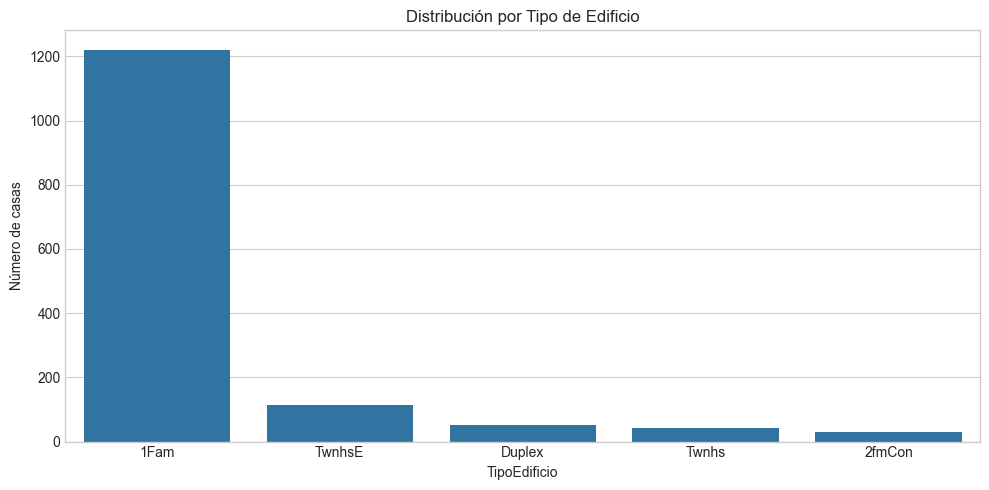

1Fam: Unifamiliar, TwnhsE: Casa adosada extremo, Duplex: Vivienda dúplex, Twnhs: Casa adosada interior, 2fmCon: Conversión bifamiliar


In [47]:
# Obtenemos todas las variables categóricas
cat_cols = train_data_clean.select_dtypes(include=["object", "category"]).columns
print(cat_cols)

# Algunas variables categóricas
key_cat_vars = ['Vecindario', 'ZonificaciónMS', 'TipoEdificio']

# Distribución de valores para Vecindario 
plt.figure(figsize=(12, 6))
vecindario_counts = train_data_clean['Vecindario'].value_counts().sort_values(ascending=False)
top_neighborhoods = vecindario_counts.head(10)

sns.barplot(x=top_neighborhoods.index, y=top_neighborhoods.values)
plt.title('Los 10 vecindarios más comunes')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de casas')
plt.tight_layout()
plt.show()

# Distribución de ZonificaciónMS
plt.figure(figsize=(10, 5))
zoning_counts = train_data_clean['ZonificaciónMS'].value_counts()
sns.barplot(x=zoning_counts.index, y=zoning_counts.values)
plt.title('Distribución por Zonificación')
plt.ylabel('Número de casas')
plt.tight_layout()
plt.show()
print("RL: Residencial Baja Densidad, RM: Residencial Media Densidad, FV: Pueblo Flotante, RH: Residencial Alta Densidad, C: Comercial")

# Distribución de TipoEdificio
plt.figure(figsize=(10, 5))
building_counts = train_data_clean['TipoEdificio'].value_counts()
sns.barplot(x=building_counts.index, y=building_counts.values)
plt.title('Distribución por Tipo de Edificio')
plt.ylabel('Número de casas')
plt.tight_layout()
plt.show()
print("1Fam: Unifamiliar, TwnhsE: Casa adosada extremo, Duplex: Vivienda dúplex, Twnhs: Casa adosada interior, 2fmCon: Conversión bifamiliar")

<small>

**Observaciones sobre distribución de categorías:**  
- **Vecindario:** La mayoría de las casas se concentran en unos pocos vecindarios principales.  
- **ZonificaciónMS:** La categoría **RL** (Residencial Baja Densidad) predomina en el dataset.

</small>


#### **6.2. Relación entre variables categóricas clave y precio**

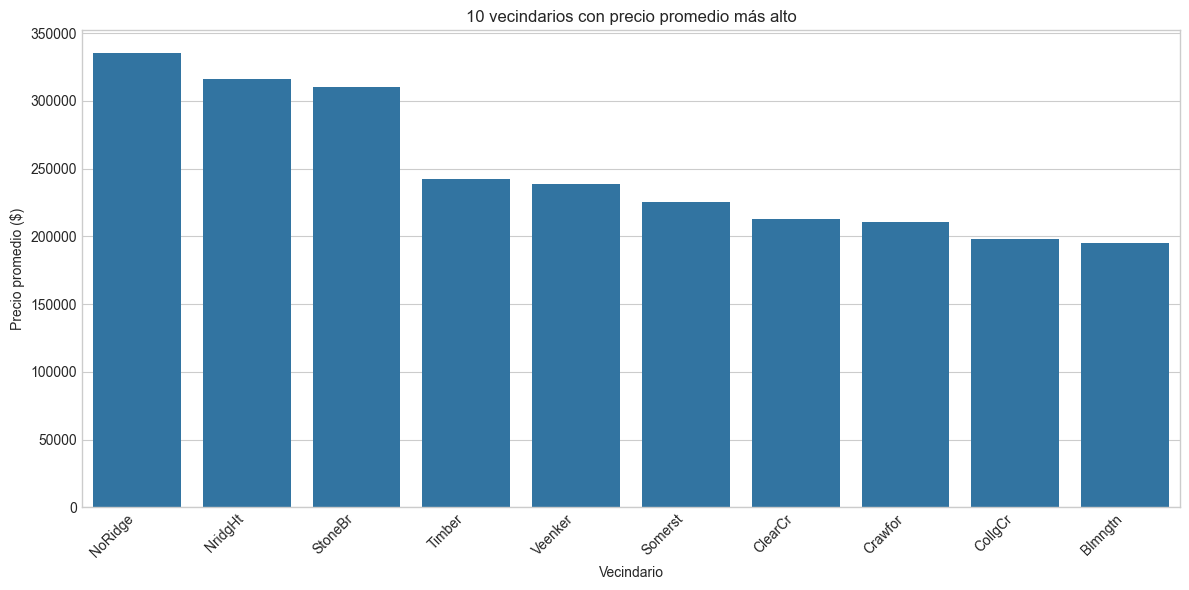

El análisis muestra que los vecindarios más caros (NoRidge, NridgHt, StoneBr) tienen precios significativamente más altos que el resto.


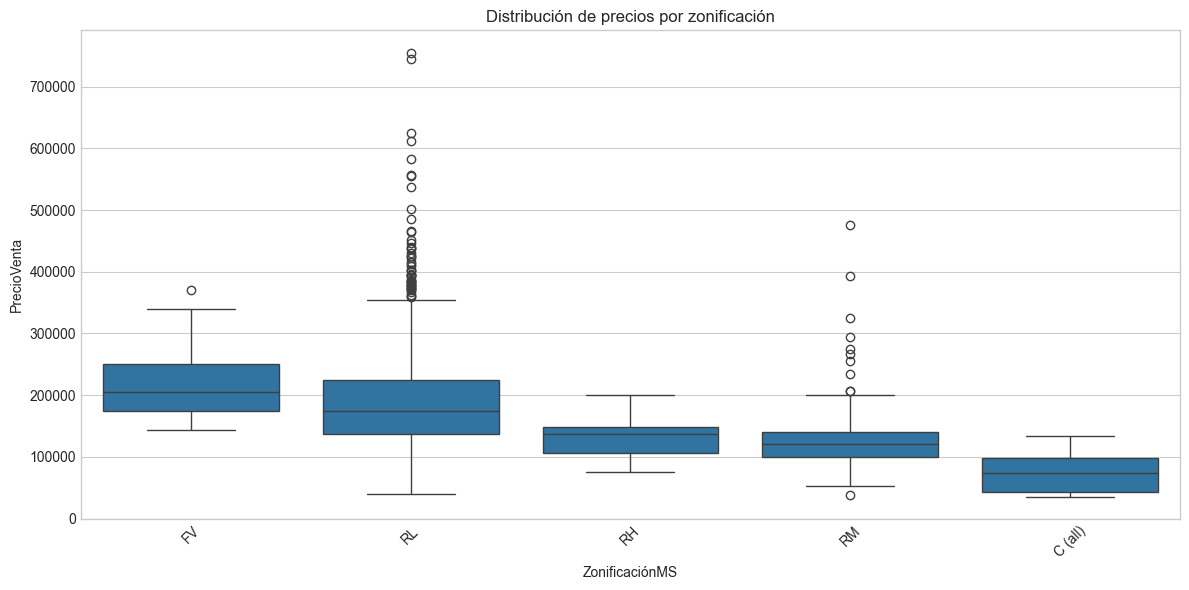

FV (Pueblo Flotante) y RL (Residencial Baja Densidad) muestran los precios más altos y mayor variabilidad, mientras que C (Comercial) tiene los precios más bajos.


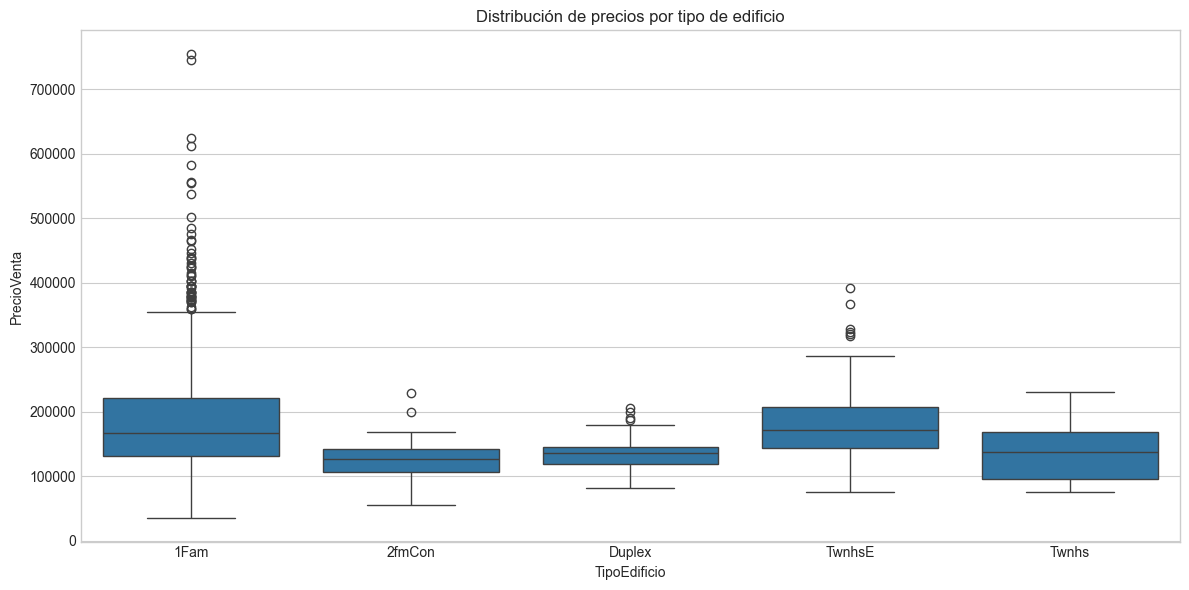

Las viviendas unifamiliares (1Fam) y adosadas en extremos (TwnhsE) tienen precios más altos y mayor variabilidad que otros tipos como duplex o conversiones bifamiliares.


In [48]:
# Análisis de precio por vecindario (top 10 por precio promedio)
plt.figure(figsize=(12, 6))
neighborhood_price = train_data_clean.groupby('Vecindario')['PrecioVenta'].mean().sort_values(ascending=False)
top_expensive = neighborhood_price.head(10)

sns.barplot(x=top_expensive.index, y=top_expensive.values)
plt.title('10 vecindarios con precio promedio más alto')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Precio promedio ($)')
plt.tight_layout()
plt.show()
print("El análisis muestra que los vecindarios más caros (NoRidge, NridgHt, StoneBr) tienen precios significativamente más altos que el resto.")

# Boxplot de precio por zonificación
plt.figure(figsize=(12, 6))
sns.boxplot(x='ZonificaciónMS', y='PrecioVenta', data=train_data_clean, 
           order=train_data_clean.groupby('ZonificaciónMS')['PrecioVenta'].median().sort_values(ascending=False).index)
plt.title('Distribución de precios por zonificación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("FV (Pueblo Flotante) y RL (Residencial Baja Densidad) muestran los precios más altos y mayor variabilidad, mientras que C (Comercial) tiene los precios más bajos.")

# Boxplot de precio por tipo de edificio
plt.figure(figsize=(12, 6))
sns.boxplot(x='TipoEdificio', y='PrecioVenta', data=train_data_clean)
plt.title('Distribución de precios por tipo de edificio')
plt.tight_layout()
plt.show()
print("Las viviendas unifamiliares (1Fam) y adosadas en extremos (TwnhsE) tienen precios más altos y mayor variabilidad que otros tipos como duplex o conversiones bifamiliares.")

#### **6.3. Estadísticas de precio por categorías principales**

In [49]:
# Estadísticas de precio por vecindario (top 10)
price_by_neigh = train_data_clean.groupby('Vecindario')['PrecioVenta'].agg(['mean', 'median', 'count', 'std'])
price_by_neigh = price_by_neigh.sort_values('mean', ascending=False)

print("\nEstadísticas de precio por vecindario (10 más caros):")
display(price_by_neigh.head(10))

# Estadísticas de precio por zonificación
price_by_zoning = train_data_clean.groupby('ZonificaciónMS')['PrecioVenta'].agg(['mean', 'median', 'count', 'std'])
price_by_zoning = price_by_zoning.sort_values('mean', ascending=False)

print("\nEstadísticas de precio por zonificación:")
display(price_by_zoning)

# Estadísticas de precio por tipo de edificio
price_by_building = train_data_clean.groupby('TipoEdificio')['PrecioVenta'].agg(['mean', 'median', 'count', 'std'])
price_by_building = price_by_building.sort_values('mean', ascending=False)

print("\nEstadísticas de precio por tipo de edificio:")
display(price_by_building)


Estadísticas de precio por vecindario (10 más caros):


,mean,median,count,std
Vecindario,,,,
NoRidge,335295.317073,301500.0,41,121412.658640
NridgHt,316270.623377,315000.0,77,96392.544954
StoneBr,310499.000000,278000.0,25,112969.676640
Timber,242247.447368,228475.0,38,64845.651549
Veenker,238772.727273,218000.0,11,72369.317959
Somerst,225379.837209,225500.0,86,56177.555888
ClearCr,212565.428571,200250.0,28,50231.538993
Crawfor,210624.725490,200624.0,51,68866.395472
CollgCr,197965.773333,197200.0,150,51403.666438



Estadísticas de precio por zonificación:


,mean,median,count,std
ZonificaciónMS,,,,
FV,214014.061538,205950.0,65,52369.662067
RL,191004.994787,174000.0,1151,80766.341319
RH,131558.375000,136500.0,16,35714.118435
RM,126316.830275,120500.0,218,48521.689833
C (all),74528.000000,74700.0,10,33791.092031



Estadísticas de precio por tipo de edificio:


,mean,median,count,std
TipoEdificio,,,,
1Fam,185763.807377,167900.0,1220,82648.502922
TwnhsE,181959.342105,172200.0,114,60626.108918
Twnhs,135911.627907,137500.0,43,41013.222080
Duplex,133541.076923,135980.0,52,27833.249197
2fmCon,128432.258065,127500.0,31,35458.545158


<small>

**Observaciones sobre precios por categoría:**  
- Los vecindarios influyen enormemente en el precio, con diferencias de hasta 3 veces entre zonas.  
- Las zonificaciones **FV** (Flotante Pueblo) y **RL** (Residencial Baja Densidad) tienen los precios más altos.  
- Las casas unifamiliares (**1Fam**) tienen precios significativamente más altos que otros tipos.

</small>


## **7. Conclusiones**

1. Sobre los precios de venta:
   - Los precios van desde aproximadamente $35,000 hasta $755,000
   - El precio promedio es alrededor de $180,000
   - La distribución muestra asimetría positiva (más casas de precio medio-bajo)

2. Variables numéricas más influyentes:
   - CalidadGeneral: La calidad general de la construcción es el factor más determinante
   - MetrosHabitables: El tamaño habitable muestra fuerte correlación con el precio
   - Características del garaje: Tanto capacidad como tamaño son importantes predictores
   - MetrosTotalesSótano: El área del sótano contribuye significativamente al valor

3. Variables categóricas clave:
   - Vecindario: Factor determinante con gran variación de precios entre zonas
   - ZonificaciónMS: Las zonas residenciales de baja densidad tienen precios más altos
   - TipoEdificio: Las casas unifamiliares son significativamente más valoradas
   - Estos factores deberán codificarse adecuadamente para los modelos

4. Hallazgos sobre outliers:
   - Se identificaron valores atípicos en variables clave como MetrosHabitables y ÁreaGaraje
   - Estos outliers representan propiedades con características excepcionales
   - Su tratamiento podría impactar significativamente los resultados de algunos modelos